In [1]:
import os
import glob
import copy
import time
import pickle
import numpy as np
import scipy.io
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import signal
#from data_loader import*
from data_preprocessing import*

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras.utils.np_utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import *
from tensorflow.keras.regularizers import l2,l1
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [186]:
model = 'multi_objective_cnn'
dataset = '256_channel_cVEP'
mode = 'loso_subject'
with open('./results/{}/{}/{}/{}_{}.pickle'.format(model,dataset,mode,model,mode), 'rb') as handle:
        results = pickle.load(handle)
        results_multi_objective_cnn = group_results(results) 

In [194]:
for i in range(n_classes):
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34


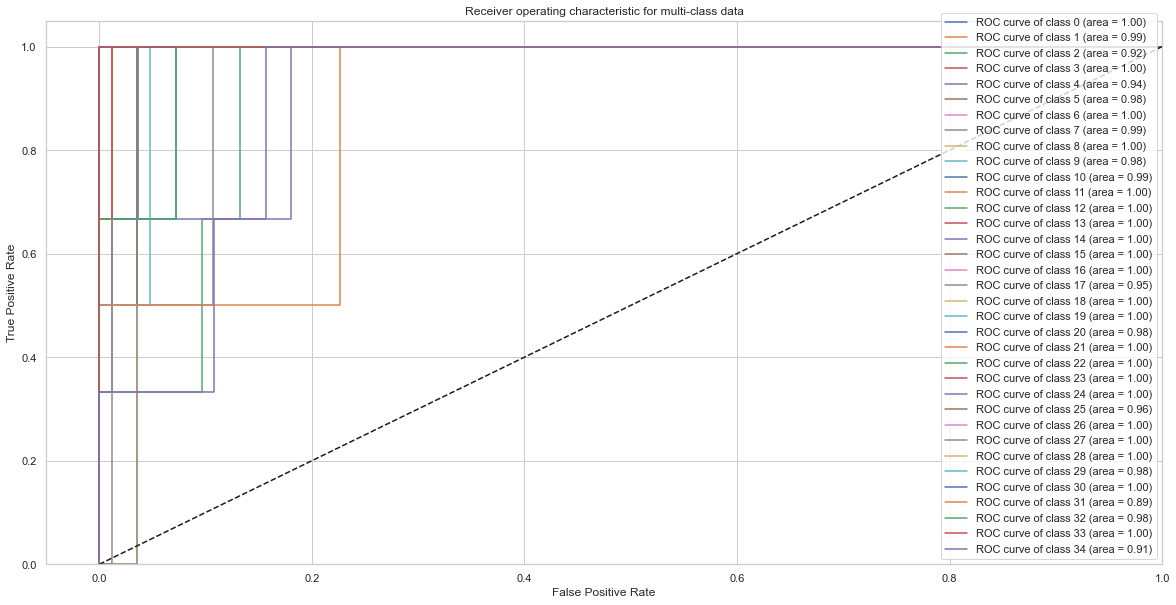

In [193]:
fpr = results[1][1]['fpr']
tpr = results[1][1]['tpr']
roc_auc = results[1][1]['auc']

n_classes = 35
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=1.5,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

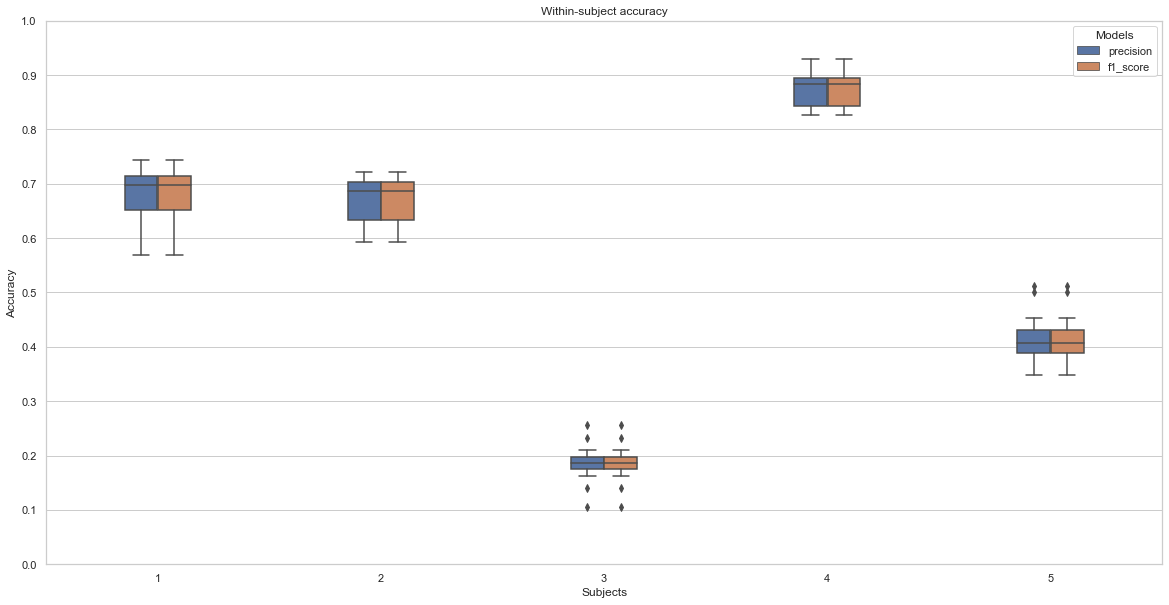

In [170]:
group = results_multi_objective_cnn['group']
group1_label = 'precision'
group2_label = 'f1_score'
group1 = results_multi_objective_cnn[group1_label]
group2 = results_multi_objective_cnn[group2_label]


df = pd.DataFrame({'Subjects':group,group1_label:group1,group2_label:group2})
df = df[['Subjects',group1_label,group2_label]]

sns.set(rc={'figure.figsize':(20,10)})
sns.set_style("whitegrid")
dd=pd.melt(df,id_vars=['Subjects'],value_vars=[group1_label,group2_label],var_name='Models')
ax = sns.boxplot(x='Subjects',y='value',data=dd,hue='Models', width=0.3)
ax.set_title('Within-subject accuracy')
ax.set(ylabel='Accuracy')
ax.set_ylim(0, 1)
ax.set_yticks(np.arange(0,1.01,0.1))
plt.show()

In [167]:
def group_results(results):
    group = []
    category_accuracy = []
    sequence_accuracy = []
    ITR = []
    recall_all = []
    precision_all = []
    f1_score_all = []
    results_grouped = {}
    for i in results.keys():
        results_cv = results[i] 
        if 'history' in results_cv.keys():
            results_cv_len= len(results_cv)-1
        else:
            results_cv_len= len(results_cv)
            
        for j in range(1,results_cv_len+1):
            group.append(i)
            category_accuracy.append(float(results_cv[j]['category_accuracy']))
            ITR.append(float(results_cv[j]['ITR']))

            if(model == 'multi_objective_cnn'):
                sequence_accuracy.append(float(results_cv[j]['sequence_accuracy']))
                cm = results[i][j]['category_cm']
                recall = float(results[i][j]['recall'])
                precision = float(results[i][j]['precision'])
                f1_score = float(results[i][j]['f1_score'])
                recall_all.append(recall)
                precision_all.append(precision)
                f1_score_all.append(f1_score)
                
    results_grouped['group'] = group            
    results_grouped['category_accuracy'] = category_accuracy
    results_grouped['sequence_accuracy'] = sequence_accuracy
    results_grouped['ITR'] = ITR
    if(model == 'multi_objective_cnn'):
        results_grouped['recall'] = recall_all
        results_grouped['precision'] = precision_all
        results_grouped['f1_score'] = f1_score_all

    return results_grouped

In [136]:
model = 'cca'
dataset = '256_channel_cVEP'
mode = 'loso_subject'
with open('./results/{}/{}/{}/{}_{}.pickle'.format(model,dataset,mode,model,mode), 'rb') as handle:
        results = pickle.load(handle)
        results_cca = group_results(results)  
        
model = 'multi_objective_cnn'
dataset = '256_channel_cVEP'
mode = 'loso_subject'
with open('./results/{}/{}/{}/{}_{}.pickle'.format(model,dataset,mode,model,mode), 'rb') as handle:
        results = pickle.load(handle)
        results_multi_objective_cnn = group_results(results)   

1 1 0.6990740740740741 0.7574074074074075
1 2 0.6064814814814814 nan
1 3 0.6990740740740741 nan
1 4 0.6018518518518517 nan
1 5 0.6527777777777778 nan
1 6 0.7268518518518517 0.775462962962963
1 7 0.7546296296296295 0.7875
1 8 0.7083333333333334 nan
1 9 0.6898148148148148 nan
1 10 0.6990740740740741 0.725
1 11 0.7037037037037037 nan
1 12 0.6481481481481481 nan
1 13 0.6342592592592593 0.7060185185185185
1 14 0.6805555555555556 nan
1 15 0.6527777777777778 nan
2 1 0.7268518518518517 nan
2 2 0.7685185185185186 nan
2 3 0.7175925925925926 nan
2 4 0.7407407407407408 nan
2 5 0.8055555555555556 nan
2 6 0.75 nan
2 7 0.699074074074074 nan
2 8 0.7638888888888888 nan
2 9 0.7037037037037037 nan
2 10 0.7499999999999999 0.8027777777777777
2 11 0.7731481481481481 0.8125
2 12 0.6990740740740741 0.7597222222222222
2 13 0.699074074074074 nan
2 14 0.75 nan
2 15 0.736111111111111 nan
3 1 0.20370370370370366 nan
3 2 0.11574074074074073 nan
3 3 0.07407407407407407 nan
3 4 0.16203703703703703 nan
3 5 0.166666666

C:\Users\rohit\AppData\Local\Temp\ipykernel_15520\2183819351.py:26: RuntimeWarning: invalid value encountered in true_divide
  precision = np.diag(cm) / np.sum(cm, axis = 0)


In [114]:
results_multi_objective_cnn['precision'][0][0][0]

[[...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...],
 [...]]

In [100]:
len(results_multi_objective_cnn['category_accuracy'])

70

In [ ]:
df = pd.DataFrame({'Subjects':group,'sequence_accuracy':sequence_accuracy,'category_accuracy':category_accuracy})
df = df[['Subjects','sequence_accuracy','category_accuracy']]

sns.set(rc={'figure.figsize':(20,10)})
sns.set_style("whitegrid")
dd=pd.melt(df,id_vars=['Subjects'],value_vars=['sequence_accuracy','category_accuracy'],var_name='Models')
ax = sns.boxplot(x='Subjects',y='value',data=dd,hue='Models', width=0.3)
ax.set_title('Within-subject accuracy')
ax.set(ylabel='Accuracy')
ax.set_ylim(0, 1)
ax.set_yticks(np.arange(0,1.01,0.1))
plt.show()

In [21]:
results[1][1].keys()

dict_keys(['category_accuracy', 'sequence_accuracy', 'sequence_cm', 'category_cm', 'ITR'])

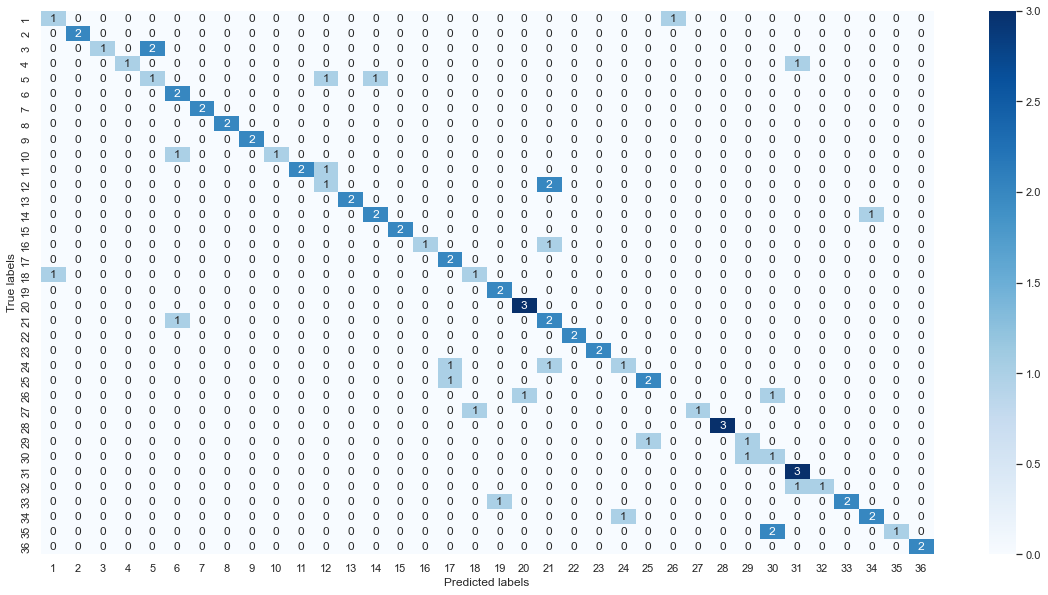

In [66]:
labels = np.arange(1,37)
cm_plot = sns.heatmap(cm, annot=True, xticklabels=labels, yticklabels=labels, cmap='Blues')
cm_plot.set(xlabel='Predicted labels', ylabel='True labels')
plt.show()

In [55]:
cm = results[1][1]['category_cm']
recall = np.diag(cm) / np.sum(cm, axis = 1)
precision = np.diag(cm) / np.sum(cm, axis = 0)

recall = np.mean(recall)
precision = np.mean(precision)

f1_score = 2*((precision*recall)/(precision+recall))
recall,precision,f1_score 

(0.6990740740740741, 0.7574074074074075, 0.7270725907089544)

In [125]:
group = []
category_accuracy = []
sequence_accuracy = []
ITR = []
for i in results.keys():
    results_cv = results[i] 
    for j in range(1,len(results_cv)-1):
        group.append(i)
        category_accuracy.append(float(results_cv[j]['category_accuracy']/100))
        sequence_accuracy.append(float(results_cv[j]['sequence_accuracy']/100))
        ITR.append(float(results_cv[j]['ITR']))
        
        cm = results[i][j]['category_cm']
        recall = np.diag(cm) / np.sum(cm, axis = 1)
        precision = np.diag(cm) / np.sum(cm, axis = 0)

        recall = np.mean(recall)
        precision = np.mean(precision)
        f1_score = 2*((precision*recall)/(precision+recall))

C:\Users\rohit\AppData\Local\Temp\ipykernel_15520\2638329703.py:15: RuntimeWarning: invalid value encountered in true_divide
  precision = np.diag(cm) / np.sum(cm, axis = 0)


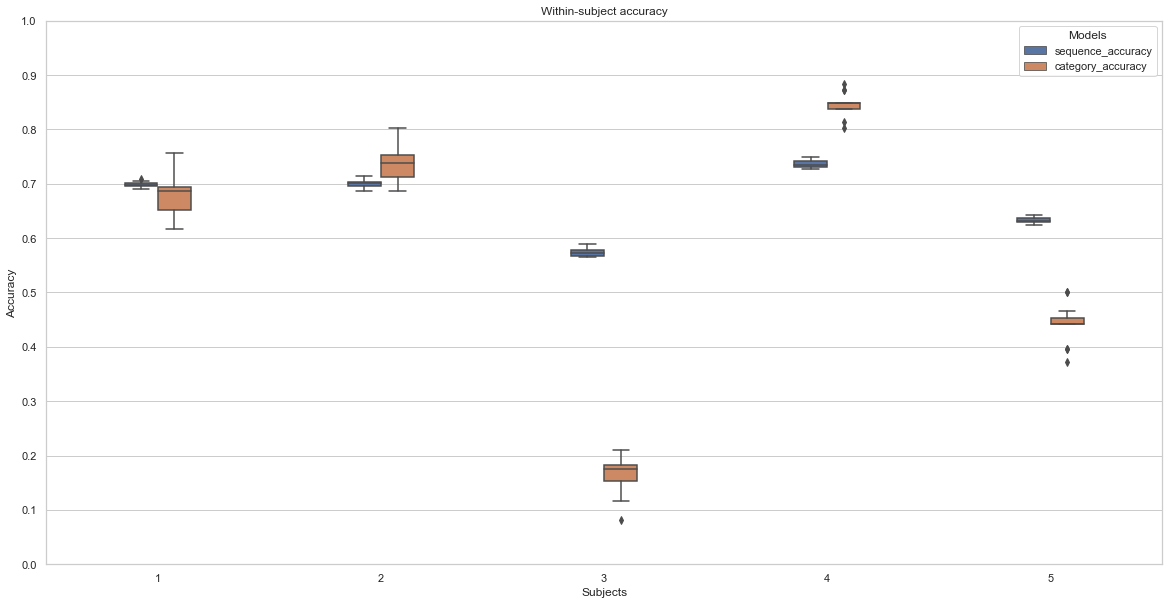

In [53]:
df = pd.DataFrame({'Subjects':group,'sequence_accuracy':sequence_accuracy,'category_accuracy':category_accuracy})
df = df[['Subjects','sequence_accuracy','category_accuracy']]

sns.set(rc={'figure.figsize':(20,10)})
sns.set_style("whitegrid")
dd=pd.melt(df,id_vars=['Subjects'],value_vars=['sequence_accuracy','category_accuracy'],var_name='Models')
ax = sns.boxplot(x='Subjects',y='value',data=dd,hue='Models', width=0.3)
ax.set_title('Within-subject accuracy')
ax.set(ylabel='Accuracy')
ax.set_ylim(0, 1)
ax.set_yticks(np.arange(0,1.01,0.1))
plt.show()

In [ ]:
group = []
category_accuracy = []
sequence_accuracy = []
ITR = []
for i in results_cnn_ts.keys():
    results_cv = results[i]
    
    for j in range(1,len(results_cv)-1):
        group.append(i)
        category_accuracy.append(float(results_cv[j]['category_accuracy']))
        sequence_accuracy.append(float(results_cv[j]['sequence_accuracy']))
        ITR.append(float(results_cv[j]['ITR']))

df = pd.DataFrame({'Subjects':group,'cnn_ts':cnn_ts_list,'cnn':cnn_list})
df = df[['Subjects','cnn_ts','cnn']]

sns.set(rc={'figure.figsize':(20,10)})
dd=pd.melt(df,id_vars=['Subjects'],value_vars=['cnn_ts','cnn'],var_name='Models')
ax = sns.boxplot(x='Subjects',y='value',data=dd,hue='Models')
ax.set_title('Within-subject accuracy')
ax.set(ylabel='Accuracy')
plt.show()

In [8]:
results[1][1].keys()

dict_keys(['category_accuracy', 'sequence_accuracy', 'ITR'])